In [1]:
!pip install mlxtend

In [2]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
#load data
data = pd.read_excel('Online retail.xlsx')

In [4]:
data.head(10)

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
5,"whole wheat pasta,french fries"
6,"soup,light cream,shallot"
7,"frozen vegetables,spaghetti,green tea"
8,french fries
9,"eggs,pet food"


In [5]:
data.tail(10)

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
7490,herb & pepper
7491,"chocolate,escalope"
7492,"burgers,salmon,pancakes,french fries,frozen sm..."
7493,"turkey,burgers,dessert wine,shrimp,pasta,tomat..."
7494,"pancakes,light mayo"
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"
7499,"eggs,frozen smoothie,yogurt cake,low fat yogurt"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [7]:
data.shape

(7500, 1)

In [8]:
data.dtypes

,0
"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil",object


In [9]:
data[data.duplicated()] #duplicates

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
33,cookies
41,spaghetti
59,spaghetti
63,"turkey,eggs"
64,french fries
...,...
7490,herb & pepper
7491,"chocolate,escalope"
7494,"pancakes,light mayo"
7497,chicken


In [10]:
print("Duplicate transactions:", data.duplicated().sum())


Duplicate transactions: 2325


In [11]:
# dropping duplicates
data = data.drop_duplicates()

In [12]:
print("Duplicate transactions after removal:", data.duplicated().sum())

Duplicate transactions after removal: 0


In [13]:
#checking null values
data.isna().sum()

,0
"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil",0


# Pre-Processing
As the data is not in transaction formation
We are using transaction Encoder

In [14]:
data["Transactions"] = data.iloc[:, 0].apply(lambda x: x.split(","))
data = data[["Transactions"]]

In [15]:
# Convert transaction data into a format suitable for Apriori
te = TransactionEncoder()
te_ary = te.fit(data["Transactions"]).transform(data["Transactions"])
data_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [16]:
data_encoded.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apriori Algorithm

In [17]:
frequent_itemsets = apriori(data_encoded, min_support=0.02, use_colnames=True)

In [18]:
frequent_itemsets

,support,itemsets
0,0.029179,(almonds)
1,0.045797,(avocado)
2,0.020483,(black tea)
3,0.045024,(brownies)
4,0.113816,(burgers)
...,...,...
169,0.020097,"(chocolate, mineral water, milk)"
170,0.022995,"(chocolate, mineral water, spaghetti)"
171,0.020676,"(eggs, mineral water, spaghetti)"
172,0.024734,"(mineral water, ground beef, spaghetti)"


In [20]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(chocolate),(burgers),0.205217,0.113816,0.024541,0.119586,1.050689,1.0,0.001184,1.006553,0.060701,0.083333,0.006510,0.167603
1,(burgers),(chocolate),0.113816,0.205217,0.024541,0.215620,1.050689,1.0,0.001184,1.013262,0.054440,0.083333,0.013088,0.167603
2,(eggs),(burgers),0.208116,0.113816,0.036135,0.173630,1.525531,1.0,0.012448,1.072382,0.435026,0.126437,0.067496,0.245559
3,(burgers),(eggs),0.113816,0.208116,0.036135,0.317487,1.525531,1.0,0.012448,1.160248,0.388735,0.126437,0.138115,0.245559
4,(burgers),(french fries),0.113816,0.192657,0.029372,0.258065,1.339502,1.0,0.007444,1.088158,0.286006,0.105997,0.081016,0.205261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,"(mineral water, spaghetti)",(milk),0.085024,0.170048,0.022609,0.265909,1.563727,1.0,0.008150,1.130584,0.394002,0.097257,0.115502,0.199432
212,"(milk, spaghetti)",(mineral water),0.050048,0.299710,0.022609,0.451737,1.507248,1.0,0.007609,1.277289,0.354270,0.069108,0.217092,0.263586
213,(mineral water),"(milk, spaghetti)",0.299710,0.050048,0.022609,0.075435,1.507248,1.0,0.007609,1.027458,0.480571,0.069108,0.026724,0.263586
214,(milk),"(mineral water, spaghetti)",0.170048,0.085024,0.022609,0.132955,1.563727,1.0,0.008150,1.055280,0.434365,0.097257,0.052384,0.199432



# **Analysis and Interpretation**  
# A leverage value of 0 indicates independence. Range will be [-1, 1]  
# A high conviction value means that the consequent is highly dependent on the antecedent and range [0, inf]

In [21]:

rules.sort_values('lift', ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
122,(herb & pepper),(ground beef),0.066473,0.135845,0.022802,0.343023,2.525100,1.0,0.013772,1.315350,0.646983,0.127018,0.239746,0.255438
123,(ground beef),(herb & pepper),0.135845,0.066473,0.022802,0.167852,2.525100,1.0,0.013772,1.121828,0.698921,0.127018,0.108597,0.255438
205,"(mineral water, spaghetti)",(ground beef),0.085024,0.135845,0.024734,0.290909,2.141472,1.0,0.013184,1.218680,0.582563,0.126108,0.179440,0.236493
208,(ground beef),"(mineral water, spaghetti)",0.135845,0.085024,0.024734,0.182077,2.141472,1.0,0.013184,1.118657,0.616824,0.126108,0.106071,0.236493
115,(tomatoes),(frozen vegetables),0.091981,0.129855,0.022609,0.245798,1.892867,1.0,0.010665,1.153730,0.519483,0.113482,0.133246,0.209953
114,(frozen vegetables),(tomatoes),0.129855,0.091981,0.022609,0.174107,1.892867,1.0,0.010665,1.099440,0.542094,0.113482,0.090446,0.209953
110,(shrimp),(frozen vegetables),0.098744,0.129855,0.023768,0.240705,1.853640,1.0,0.010946,1.145990,0.510977,0.116038,0.127392,0.211870
111,(frozen vegetables),(shrimp),0.129855,0.098744,0.023768,0.183036,1.853640,1.0,0.010946,1.103177,0.529246,0.116038,0.093527,0.211870
209,(spaghetti),"(mineral water, ground beef)",0.229565,0.058744,0.024734,0.107744,1.834131,1.0,0.011249,1.054917,0.590293,0.093842,0.052058,0.264398
204,"(mineral water, ground beef)",(spaghetti),0.058744,0.229565,0.024734,0.421053,1.834131,1.0,0.011249,1.330751,0.483166,0.093842,0.248545,0.264398


In [22]:

rules[rules.lift > 2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
122,(herb & pepper),(ground beef),0.066473,0.135845,0.022802,0.343023,2.525100,1.0,0.013772,1.315350,0.646983,0.127018,0.239746,0.255438
123,(ground beef),(herb & pepper),0.135845,0.066473,0.022802,0.167852,2.525100,1.0,0.013772,1.121828,0.698921,0.127018,0.108597,0.255438
205,"(mineral water, spaghetti)",(ground beef),0.085024,0.135845,0.024734,0.290909,2.141472,1.0,0.013184,1.218680,0.582563,0.126108,0.179440,0.236493
208,(ground beef),"(mineral water, spaghetti)",0.135845,0.085024,0.024734,0.182077,2.141472,1.0,0.013184,1.118657,0.616824,0.126108,0.106071,0.236493


Total number of association rules: 216


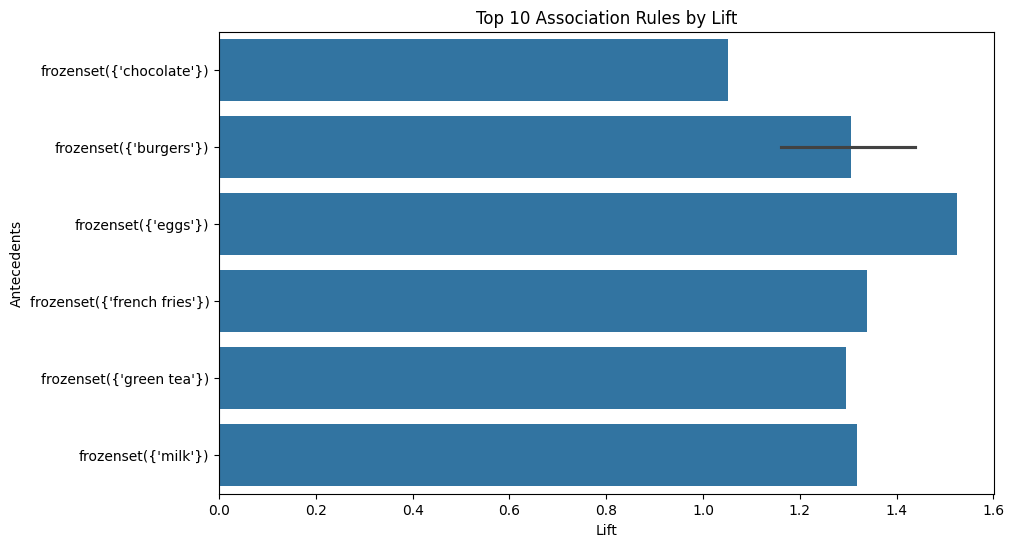

In [23]:
# Count of rules generated
print(f"Total number of association rules: {rules.shape[0]}")

plt.figure(figsize=(10, 6))
sns.barplot(x=rules.lift[:10], y=rules["antecedents"][:10].astype(str), orient='h')
plt.xlabel("Lift")
plt.ylabel("Antecedents")
plt.title("Top 10 Association Rules by Lift")
plt.show()


# scatter plot

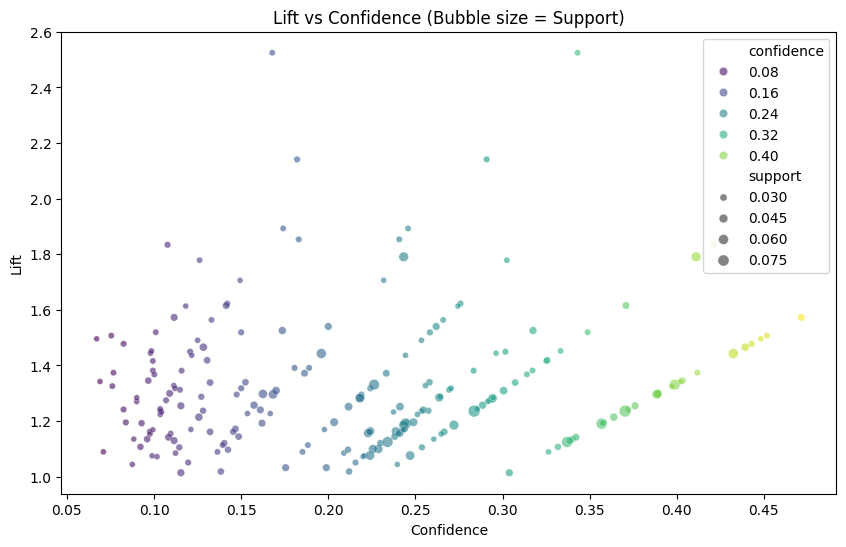

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rules["confidence"], y=rules["lift"], size=rules["support"], alpha=0.6, hue=rules["confidence"], palette="viridis")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.title("Lift vs Confidence (Bubble size = Support)")
plt.show()


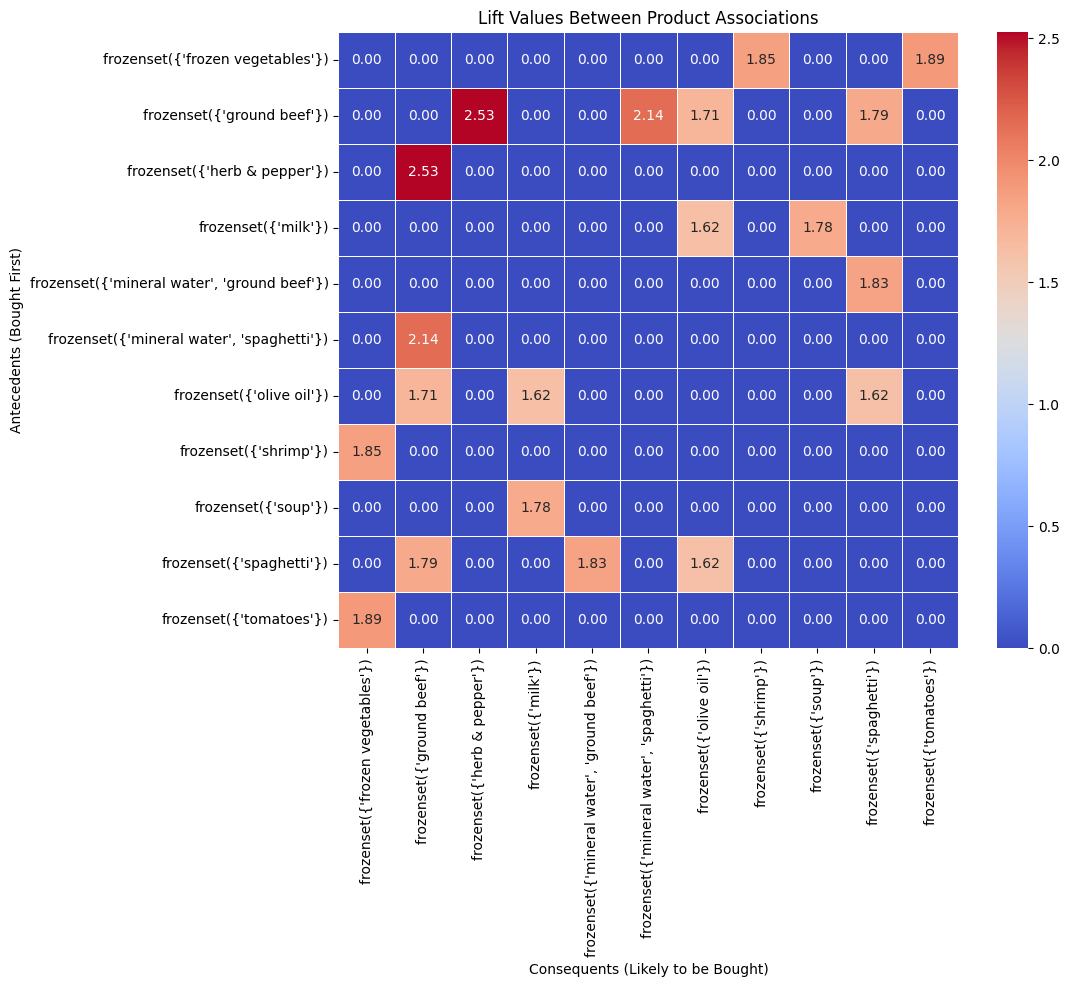

In [27]:
# Get top 20 rules for visualization
top_rules_matrix = rules.sort_values("lift", ascending=False).head(20)[["antecedents", "consequents", "lift"]]

# Convert antecedents/consequents to strings for visualization
top_rules_matrix["antecedents"] = top_rules_matrix["antecedents"].astype(str)
top_rules_matrix["consequents"] = top_rules_matrix["consequents"].astype(str)

# Create pivot table and fill NaN values with 0
pivot_table = top_rules_matrix.pivot(index="antecedents", columns="consequents", values="lift").fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Lift Values Between Product Associations")
plt.xlabel("Consequents (Likely to be Bought)")
plt.ylabel("Antecedents (Bought First)")
plt.show()


# There are strongest association in various region, you can monitor it by dark red color. However, the Medium Associations can be see by light colours.

# Interview Questions:

# What is lift and why is it important in Association rules?

**Lift is a way to measure how much more likely you are to buy one item if you already bought another, compared to if the two items were completely unrelated. For example, if buying bread makes you much more likely to also buy butter, the lift would show how strong that connection is compared to just random chance.**

# What is support and Confidence. How do you calculate them?

**Support helps identify frequently bought itemsets, ensuring the rule is statistically significant.**
**Confidence tells us how strong the relationship is between items, helping businesses in decision-making.**

#formula:

**support = number of transaction with both antecedent and consequent / total transactions**

**confidence = number of transaction with both antecedent and consequent / transaction with antecedent items**


# What are some limitations or challenges of Association rules mining?

**There are multiple dissadvantages of Association rule mining. Firsly, Scalability Issue, For instance: the dataset size increases, the number of possible itemsets grows. Secondly, difficulty in handling continous and high dimenssional data because association rule run good with categorical data. Lastly, new products with less purchase may not be included in rule mining due to low support.**

